In [1]:
%matplotlib notebook

In [244]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import statistics as stat
from scipy.stats import linregress
%matplotlib inline

In [31]:
# Study data files
mouse_metadata_df = pd.read_csv("Mouse_metadata.csv")
study_results_df = pd.read_csv("Study_results.csv")

In [32]:
mouse_metadata_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [33]:
study_results_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [34]:
# Combining the data into a single dataset

combined_df = pd.merge(mouse_metadata_df, study_results_df, how="left", on=["Mouse ID"])
combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [35]:
# Checking the number of mice in the Merged DataFrame.
total_mice = combined_df['Mouse ID'].unique()
len(total_mice)

249

In [36]:
# Checking the number of mice.
total_mice = combined_df["Mouse ID"].value_counts()
total_mice

g989    13
y769    10
k403    10
k894    10
z795    10
        ..
d133     1
l872     1
v199     1
t573     1
f932     1
Name: Mouse ID, Length: 249, dtype: int64

In [37]:
combined_df.loc[combined_df["Mouse ID"]== "g989"]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [38]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint
combined_df.loc[combined_df.duplicated(subset=["Mouse ID","Timepoint"])]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [39]:
clean_df= combined_df.loc[combined_df["Mouse ID"] != "g989"]
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [40]:
clean_df.shape

(1880, 8)

In [41]:
# Checking the number of mice in the clean DataFrame.
total_mice = clean_df['Mouse ID'].unique()
len(total_mice)

248

# Summary Statistics

In [42]:
# Using groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

Mean = (round(clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean(),2))
Median = (round(clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median(),2))
Variance = (round(clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var(),2))
Standard_Dev = (round(clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std(),2))
SEM = (round(clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem(),2))

In [43]:
Mean

Drug Regimen
Capomulin    40.68
Ceftamin     52.59
Infubinol    52.88
Ketapril     55.24
Naftisol     54.33
Placebo      54.03
Propriva     52.32
Ramicane     40.22
Stelasyn     54.23
Zoniferol    53.24
Name: Tumor Volume (mm3), dtype: float64

In [44]:
Median

Drug Regimen
Capomulin    41.56
Ceftamin     51.78
Infubinol    51.82
Ketapril     53.70
Naftisol     52.51
Placebo      52.29
Propriva     50.45
Ramicane     40.67
Stelasyn     52.43
Zoniferol    51.82
Name: Tumor Volume (mm3), dtype: float64

In [45]:
Variance

Drug Regimen
Capomulin    24.95
Ceftamin     39.29
Infubinol    43.13
Ketapril     68.55
Naftisol     66.17
Placebo      61.17
Propriva     43.85
Ramicane     23.49
Stelasyn     59.45
Zoniferol    48.53
Name: Tumor Volume (mm3), dtype: float64

In [46]:
Standard_Dev

Drug Regimen
Capomulin    4.99
Ceftamin     6.27
Infubinol    6.57
Ketapril     8.28
Naftisol     8.13
Placebo      7.82
Propriva     6.62
Ramicane     4.85
Stelasyn     7.71
Zoniferol    6.97
Name: Tumor Volume (mm3), dtype: float64

In [47]:
SEM

Drug Regimen
Capomulin    0.33
Ceftamin     0.47
Infubinol    0.49
Ketapril     0.60
Naftisol     0.60
Placebo      0.58
Propriva     0.54
Ramicane     0.32
Stelasyn     0.57
Zoniferol    0.52
Name: Tumor Volume (mm3), dtype: float64

In [48]:
# Assembling the resulting series into a single summary dataframe.


Stat_data = {
    
    'Drug Regimen':['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 
                    'Stelasyn', 'Zoniferol'], 
    'Mean': [40.68, 52.59, 52.88, 55.24, 54.33, 54.03, 52.32, 40.22, 54.23, 53.24],
    'Median': [41.56, 51.78, 51.82, 53.70, 52.51, 52.29, 50.45, 40.67, 52.43, 51.8],
    'Variance': [24.95, 39.29, 43.13, 68.55, 66.17, 61.17, 43.85, 23.49, 59.45, 48.53],
    'Std_Dev':[4.99, 6.27, 6.57, 8.28, 8.13, 7.82, 6.62, 4.85, 7.71, 6.97],
    'SEM': [0.33, 0.47, 0.49, 0.60, 0.60, 0.58, 0.54, 0.32, 0.57, 0.52]


    }


Summary_df=pd.DataFrame(Stat_data)
Summary_df

,Drug Regimen,Mean,Median,Variance,Std_Dev,SEM
0,Capomulin,40.68,41.56,24.95,4.99,0.33
1,Ceftamin,52.59,51.78,39.29,6.27,0.47
2,Infubinol,52.88,51.82,43.13,6.57,0.49
3,Ketapril,55.24,53.70,68.55,8.28,0.60
4,Naftisol,54.33,52.51,66.17,8.13,0.60
5,Placebo,54.03,52.29,61.17,7.82,0.58
6,Propriva,52.32,50.45,43.85,6.62,0.54
7,Ramicane,40.22,40.67,23.49,4.85,0.32
8,Stelasyn,54.23,52.43,59.45,7.71,0.57
9,Zoniferol,53.24,51.80,48.53,6.97,0.52


(array([  5.,  39., 129., 155., 722., 343., 255., 145.,  70.,  17.]),
 array([22.05012627, 27.70181501, 33.35350374, 39.00519248, 44.65688121,
        50.30856995, 55.96025868, 61.61194741, 67.26363615, 72.91532488,
        78.56701362]),
 <a list of 10 Patch objects>)

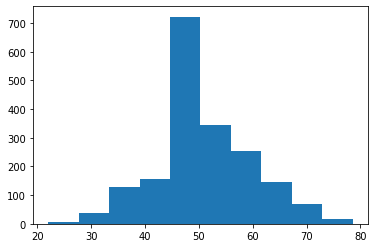

In [49]:
plt.hist(clean_df["Tumor Volume (mm3)"])

In [50]:
st.normaltest(clean_df["Tumor Volume (mm3)"])

NormaltestResult(statistic=27.586936387822888, pvalue=1.0222870917774587e-06)

In [51]:
#showing the total number of timepoints for all mice tested
drug_reg_df = clean_df["Drug Regimen"].value_counts()
drug_reg_df

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Ceftamin     178
Infubinol    178
Propriva     148
Name: Drug Regimen, dtype: int64

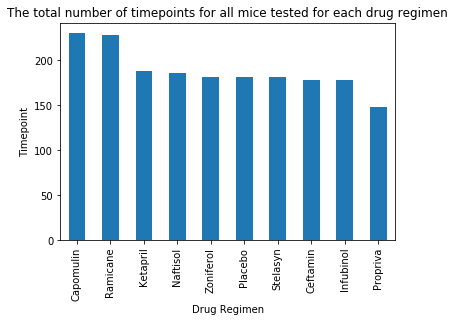

In [52]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas
bar = drug_reg_df             
bar.plot(kind = 'bar')
plt.title("The total number of timepoints for all mice tested for each drug regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Timepoint")
plt.show()

plt.title("The total number of timepoints for all mice tested for each drug regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Timepoint")
plt.legend("best")

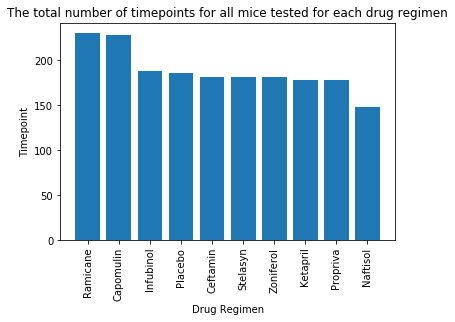

In [53]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug 
#regimen using Matplotlib 

y_axis = drug_reg_df
x_axis= clean_df['Drug Regimen'].unique()
plt.bar(x_axis, y_axis)
plt.title("The total number of timepoints for all mice tested for each drug regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Timepoint")
plt.xticks(rotation=90)
plt.show()

In [238]:
total_sex = clean_df['Sex'].value_counts()
total_sex

Male      958
Female    922
Name: Sex, dtype: int64

In [239]:
pie = total_sex
labels = ["Male", "Female"]
colors = ["lightcoral", "lightskyblue"]
explode = [0.1, 0]

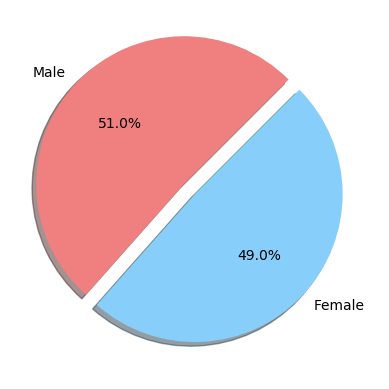

In [240]:
# Tell matplotlib to create a pie chart based upon the above 
plt.pie(pie, explode=explode, labels=labels, colors=colors, 
        autopct="%1.1f%%", shadow=True, startangle=45)

plt.show()

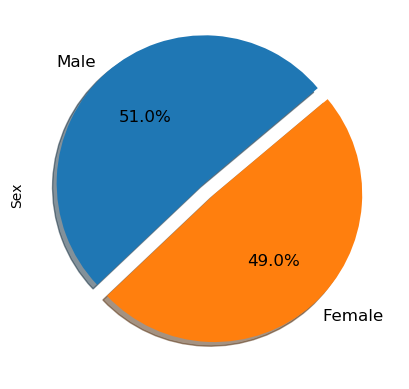

In [242]:
# Telling Pandas to create a pie chart based upon the above
pie_chart = total_sex
explode = [0.1, 0]
pie_chart.plot(kind = 'pie', fontsize= 12, explode=explode, shadow= True, autopct="%1.1f%%", startangle=40)

# Quartiles, Outliers, and Box Plot





In [64]:
sel_df = clean_df.groupby(["Mouse ID"])["Timepoint"].max()
sel_df

Mouse ID
a203    45
a251    45
a262    45
a275    45
a366    30
        ..
z435    10
z578    45
z581    45
z795    45
z969    45
Name: Timepoint, Length: 248, dtype: int64

In [65]:
new_df = pd.merge(sel_df,clean_df, on=(["Mouse ID","Timepoint"]))
new_df.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [98]:
# Put treatments into a list for for loop (and later for plot labels)

prt_drug = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

for drug in prt_drug:
    reg_tum_df = new_df.loc[new_df["Drug Regimen"]== drug]
    tumor = reg_tum_df["Tumor Volume (mm3)"]
    tumor_vol.append(tumor)


In [92]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

quartiles = tumor_vol[0].quantile([.25,.5,.75])
lowerq = quartiles[.25]
upperq = quartiles[.75]
iqr = upperq - lowerq

lowerq_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

In [93]:
lowerq_bound

20.70456164999999

In [94]:
upper_bound

51.83201549

In [95]:
quartiles_0 = tumor_vol[1].quantile([.25,.5,.75])
lowerq_0 = quartiles_0[.25]
upperq_0 = quartiles_0[.75]
iqr_0 = upperq_0 - lowerq_0

lowerq_bound_0 = lowerq_0 - (1.5*iqr_0)
upper_bound_0 = upperq_0 + (1.5*iqr_0)

In [96]:
lowerq_bound_0

17.912664470000003

In [97]:
upper_bound_0

54.30681135

In [86]:
quartiles_1 = tumor_vol[2].quantile([.25,.5,.75])
lowerq_1 = quartiles_1[.25]
upperq_1 = quartiles_1[.75]
iqr_1 = upperq_1 - lowerq_1

lowerq_bound_1 = lowerq_1 - (1.5*iqr_1)
upper_bound_1 = upperq_1 + (1.5*iqr_1)

In [87]:
lowerq_bound_1

36.83290494999999

In [88]:
upper_bound_1

82.74144559000001

In [89]:
quartiles_2 = tumor_vol[3].quantile([.25,.5,.75])
lowerq_2 = quartiles_2[.25]
upperq_2 = quartiles_2[.75]
iqr_2 = upperq_2 - lowerq_2

lowerq_bound_2 = lowerq_2 - (1.5*iqr_2)
upper_bound_2 = upperq_2 + (1.5*iqr_2)

In [90]:
lowerq_bound_2

25.355449580000002

In [91]:
upper_bound_2

87.66645829999999

In [101]:
# Showing values for mice treated with Capomulin
cap_mouse = clean_df.loc[clean_df["Drug Regimen"]== "Capomulin"]["Mouse ID"].value_counts()
cap_mouse

g288    10
r554    10
s185    10
l897    10
v923    10
b742    10
x401    10
w914    10
g316    10
b128    10
s710    10
j119    10
i557    10
m601    10
i738    10
t565    10
u364    10
m957    10
y793    10
l509    10
r944    10
j246     8
f966     5
r157     4
w150     3
Name: Mouse ID, dtype: int64

In [185]:
# Preparing Mouse with Mouse ID l897 for plotting

l897 = clean_df.loc[clean_df["Mouse ID"]== "l897"]
l897

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
273,l897,Capomulin,Male,17,19,0,45.000000,0
274,l897,Capomulin,Male,17,19,5,45.462243,0
275,l897,Capomulin,Male,17,19,10,46.154737,0
276,l897,Capomulin,Male,17,19,15,44.061521,0
277,l897,Capomulin,Male,17,19,20,44.813093,0
278,l897,Capomulin,Male,17,19,25,45.354679,0
279,l897,Capomulin,Male,17,19,30,39.352792,1
280,l897,Capomulin,Male,17,19,35,37.682767,1
281,l897,Capomulin,Male,17,19,40,38.343902,1
282,l897,Capomulin,Male,17,19,45,38.846876,1


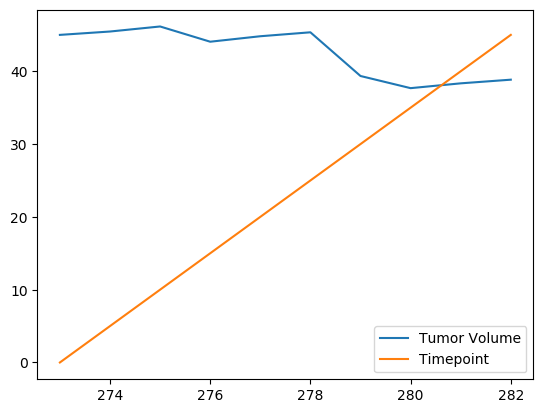

In [202]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
l897['Tumor Volume (mm3)'].plot(label = "Tumor Volume")
l897['Timepoint'].plot(label = "Timepoint")
plt.legend()
plt.show()

In [200]:
capo_df = clean_df.loc[clean_df["Drug Regimen"]== "Capomulin"]
capo_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


In [110]:
# Calculating average tumor volume 

average_capo = capo_df.groupby(["Mouse ID"]).mean()
average_capo.head()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,
b128,9.0,22.0,22.5,41.963636,0.7
b742,7.0,21.0,22.5,40.083699,0.0
f966,16.0,17.0,10.0,36.505973,0.0
g288,3.0,19.0,22.5,41.990097,0.8
g316,22.0,22.0,22.5,44.613344,1.0


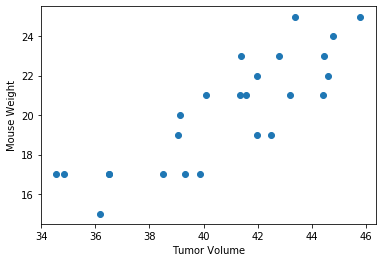

In [270]:
# Plot colour_intensity versus alcohol on a scatterplot
tumor_volume = average_capo['Tumor Volume (mm3)']
mouse_weight = average_capo['Weight (g)']
plt.scatter(tumor_volume,mouse_weight)
plt.xlabel("Tumor Volume")
plt.ylabel("Mouse Weight")
plt.show()

In [272]:
# Calculate the correlation coefficient between mouse weight and average tumor volume
print(f"The correlation coefficient between mouse weight and average tumor volume for the Capomulin regimen is {round(st.pearsonr(tumor_volume,mouse_weight)[0],2)}")

The correlation coefficient between mouse weight and average tumor volume for the Capomulin regimen is 0.84


In [274]:
reg = np.polyfit(tumor_volume,mouse_weight, deg= 1)
reg

array([  0.74269418, -10.14886316])

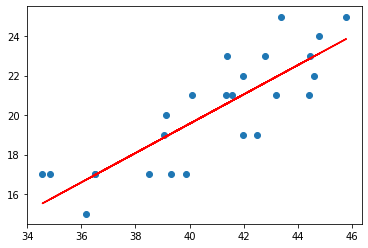

In [277]:
#linear regression model for mouse weight and average tumor volume for the Capomulin regimen
trend = np.polyval(reg, tumor_volume)
plt.scatter(tumor_volume,mouse_weight)
plt.plot(tumor_volume, trend, 'r')